<a href="https://colab.research.google.com/github/Garuooo/Signature-Verification/blob/main/Signature_Verification_First_Approch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
import os
import shutil
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as implt

In [3]:
od.download("https://www.kaggle.com/datasets/robinreni/signature-verification-dataset/")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: garuoo
Your Kaggle Key: ··········


100%|██████████| 601M/601M [00:04<00:00, 128MB/s]


In [4]:
!mkdir Train
!mkdir Test

!mkdir Train/Fake
!mkdir Train/Real

!mkdir Test/Fake
!mkdir Test/Real

In [5]:
PATH = "/content/signature-verification-dataset/sign_data/train"
for path in os.listdir(PATH):
    control = path.split("_")
    print(PATH,path)
    try:
        if control[1]=="forg":
            shutil.move(src=PATH+"/"+path,dst="/content/Train/Fake")
    except:
        shutil.move(src=PATH+"/"+path,dst="/content/Train/Real")


/content/signature-verification-dataset/sign_data/train 069
/content/signature-verification-dataset/sign_data/train 064_forg
/content/signature-verification-dataset/sign_data/train 032_forg
/content/signature-verification-dataset/sign_data/train 058
/content/signature-verification-dataset/sign_data/train 016_forg
/content/signature-verification-dataset/sign_data/train 054_forg
/content/signature-verification-dataset/sign_data/train 059_forg
/content/signature-verification-dataset/sign_data/train 066
/content/signature-verification-dataset/sign_data/train 012_forg
/content/signature-verification-dataset/sign_data/train 067_forg
/content/signature-verification-dataset/sign_data/train 064
/content/signature-verification-dataset/sign_data/train 028_forg
/content/signature-verification-dataset/sign_data/train 055
/content/signature-verification-dataset/sign_data/train 065
/content/signature-verification-dataset/sign_data/train 048_forg
/content/signature-verification-dataset/sign_data/train

In [6]:
PATH = "/content/signature-verification-dataset/sign_data/test"
for path in os.listdir(PATH):
    control = path.split("_")
    print(PATH,path)
    try:
        if control[1]=="forg":
            shutil.move(src=PATH+"/"+path,dst="/content/Test/Fake")
    except:
        shutil.move(src=PATH+"/"+path,dst="/content/Test/Real")

/content/signature-verification-dataset/sign_data/test 069
/content/signature-verification-dataset/sign_data/test 064_forg
/content/signature-verification-dataset/sign_data/test 058
/content/signature-verification-dataset/sign_data/test 054_forg
/content/signature-verification-dataset/sign_data/test 059_forg
/content/signature-verification-dataset/sign_data/test 066
/content/signature-verification-dataset/sign_data/test 067_forg
/content/signature-verification-dataset/sign_data/test 064
/content/signature-verification-dataset/sign_data/test 055
/content/signature-verification-dataset/sign_data/test 065
/content/signature-verification-dataset/sign_data/test 051
/content/signature-verification-dataset/sign_data/test 069_forg
/content/signature-verification-dataset/sign_data/test 049
/content/signature-verification-dataset/sign_data/test 060
/content/signature-verification-dataset/sign_data/test 051_forg
/content/signature-verification-dataset/sign_data/test 061_forg
/content/signature-ve

In [7]:
augmented_train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,horizontal_flip=True)
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_dir="/content/Train"
test_dir="/content/Test"

train_data=train_data_gen.flow_from_directory(train_dir,target_size=(224,224),color_mode="rgb",class_mode="binary",batch_size=64)
test_data=test_data_gen.flow_from_directory(test_dir,target_size=(224,224),color_mode="rgb",class_mode="binary",batch_size=64)
augmented_train_data=augmented_train_data_gen.flow_from_directory(train_dir,target_size=(224,224),color_mode="rgb",class_mode="binary",batch_size=64)


Found 1649 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 1649 images belonging to 2 classes.


Label :  0.0


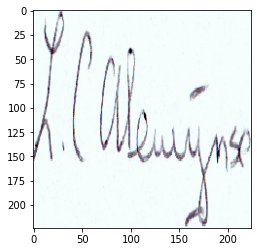

In [8]:
plt.imshow(train_data[0][0][0])
print("Label : ",train_data[0][1][0])

Label :  1.0


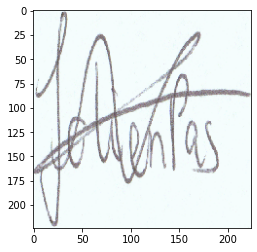

In [9]:
plt.imshow(train_data[0][0][1])
print("Label : ",train_data[0][1][1])

Label :  1.0


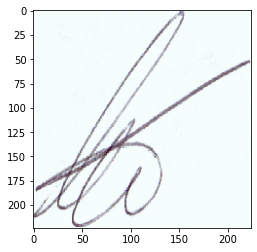

In [10]:
plt.imshow(train_data[0][0][31])
print("Label : ",train_data[0][1][31])

In [11]:
df_train=pd.read_csv("/content/signature-verification-dataset/sign_data/train_data.csv")
df_test = pd.read_csv("/content/signature-verification-dataset/sign_data/test_data.csv")

In [12]:
df_train

,068/09_068.png,068_forg/03_0113068.PNG,1
0,068/09_068.png,068_forg/01_0124068.PNG,1
1,068/09_068.png,068_forg/02_0124068.PNG,1
2,068/09_068.png,068_forg/01_0113068.PNG,1
3,068/09_068.png,068_forg/04_0124068.PNG,1
4,068/09_068.png,068_forg/04_0113068.PNG,1
...,...,...,...
23200,031/02_031.png,031/03_031.png,0
23201,031/02_031.png,031/12_031.png,0
23202,031/02_031.png,031/11_031.png,0
23203,031/02_031.png,031/06_031.png,0


In [13]:
df_test.head()

,068/09_068.png,068_forg/03_0113068.PNG,1
0,068/09_068.png,068_forg/01_0124068.PNG,1
1,068/09_068.png,068_forg/02_0124068.PNG,1
2,068/09_068.png,068_forg/01_0113068.PNG,1
3,068/09_068.png,068_forg/04_0124068.PNG,1
4,068/09_068.png,068_forg/04_0113068.PNG,1


In [ ]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)
])
model_0.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_0 = model_0.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
26/26 [==============================] - 9s 308ms/step - loss: 6.6788 - accuracy: 0.5294 - val_loss: 7.5636 - val_accuracy: 0.5040
Epoch 2/10
26/26 [==============================] - 8s 297ms/step - loss: 7.0466 - accuracy: 0.5379 - val_loss: 7.5636 - val_accuracy: 0.5040
Epoch 3/10
26/26 [==============================] - 8s 299ms/step - loss: 7.0466 - accuracy: 0.5379 - val_loss: 7.5636 - val_accuracy: 0.5040
Epoch 4/10
26/26 [==============================] - 8s 294ms/step - loss: 7.0466 - accuracy: 0.5379 - val_loss: 7.5636 - val_accuracy: 0.5040
Epoch 5/10
26/26 [==============================] - 8s 292ms/step - loss: 7.0466 - accuracy: 0.5379 - val_loss: 7.5636 - val_accuracy: 0.5040
Epoch 6/10
26/26 [==============================] - 8s 298ms/step - loss: 7.0466 - accuracy: 0.5379 - val_loss: 7.5636 - val_accuracy: 0.5040
Epoch 7/10
26/26 [==============================] - 8s 309ms/step - loss: 7.0466 - accuracy: 0.5379 - val_loss: 7.5636 - val_accuracy: 0.5040
Epoch 

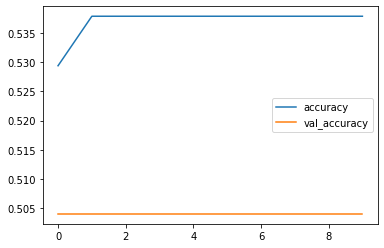

In [ ]:
pd.DataFrame({"accuracy":history_0.history["accuracy"],"val_accuracy":history_0.history["val_accuracy"]}).plot()


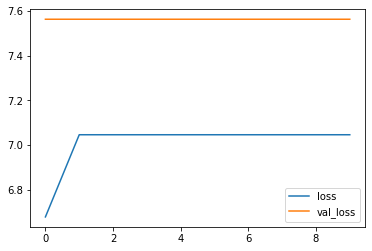

In [ ]:
pd.DataFrame({"loss":history_0.history["loss"],"val_loss":history_0.history["val_loss"]}).plot()


In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])
model_1.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.RMSprop(learning_rate=3e-5),metrics=["accuracy"])
history_1 = model_1.fit(augmented_train_data,epochs=10,validation_data=test_data)

Epoch 1/10
26/26 [==============================] - 38s 1s/step - loss: 0.6912 - accuracy: 0.5537 - val_loss: 0.6650 - val_accuracy: 0.7200
Epoch 2/10
26/26 [==============================] - 26s 977ms/step - loss: 0.6490 - accuracy: 0.6434 - val_loss: 0.5998 - val_accuracy: 0.6280
Epoch 3/10
26/26 [==============================] - 25s 944ms/step - loss: 0.5772 - accuracy: 0.7162 - val_loss: 0.5331 - val_accuracy: 0.7120
Epoch 4/10
26/26 [==============================] - 25s 936ms/step - loss: 0.5347 - accuracy: 0.7477 - val_loss: 0.4883 - val_accuracy: 0.7340
Epoch 5/10
26/26 [==============================] - 24s 934ms/step - loss: 0.4859 - accuracy: 0.7884 - val_loss: 0.3750 - val_accuracy: 0.8660
Epoch 6/10
26/26 [==============================] - 24s 927ms/step - loss: 0.4458 - accuracy: 0.8096 - val_loss: 0.4276 - val_accuracy: 0.7840
Epoch 7/10
26/26 [==============================] - 25s 942ms/step - loss: 0.4202 - accuracy: 0.8332 - val_loss: 0.3015 - val_accuracy: 0.9040
Ep

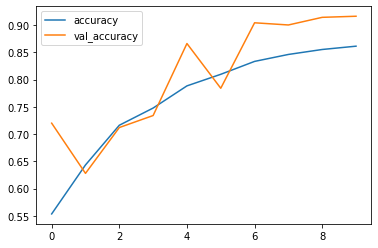

In [ ]:
pd.DataFrame({"accuracy":history_1.history["accuracy"],"val_accuracy":history_1.history["val_accuracy"]}).plot()


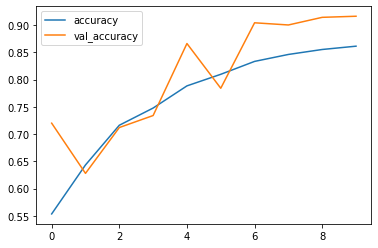

In [ ]:
pd.DataFrame({"loss":history_1.history["loss"],"val_loss":history_1.history["val_loss"]}).plot()


In [ ]:
model_0.summary(),model_1.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_19 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_21 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

(None, None)

In [ ]:
model_0.evaluate(test_data)

8/8 [==============================] - 2s 221ms/step - loss: 7.5636 - accuracy: 0.5040


[7.56362247467041, 0.5040000081062317]

In [ ]:
model_1.evaluate(test_data)


8/8 [==============================] - 2s 227ms/step - loss: 0.2720 - accuracy: 0.9160


[0.27198532223701477, 0.9160000085830688]

In [ ]:
img = tf.expand_dims(test_data[0][0][1],axis=0)
img.shape

TensorShape([1, 224, 224, 3])

In [ ]:
model_1.predict(img) , test_data[0][1][1]

1/1 [==============================] - 0s 17ms/step


(array([[0.008358]], dtype=float32), 0.0)

In [ ]:
img = tf.expand_dims(test_data[0][0][12],axis=0)
img.shape

TensorShape([1, 224, 224, 3])

In [ ]:
model_1.predict(img) , test_data[0][1][12]


1/1 [==============================] - 0s 15ms/step


(array([[0.8365605]], dtype=float32), 1.0)

In [ ]:
len(test_data)

8

In [21]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_2.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.RMSprop(3e-5),metrics=["accuracy"])
history_2 = model_2.fit(train_data,epochs=18,validation_data=test_data)

Epoch 1/18
26/26 [==============================] - 23s 824ms/step - loss: 0.6980 - accuracy: 0.5161 - val_loss: 0.6908 - val_accuracy: 0.5040
Epoch 2/18
26/26 [==============================] - 22s 835ms/step - loss: 0.6474 - accuracy: 0.6161 - val_loss: 0.5586 - val_accuracy: 0.8120
Epoch 3/18
26/26 [==============================] - 22s 850ms/step - loss: 0.5313 - accuracy: 0.7671 - val_loss: 0.4026 - val_accuracy: 0.8740
Epoch 4/18
26/26 [==============================] - 22s 834ms/step - loss: 0.4249 - accuracy: 0.8302 - val_loss: 0.3963 - val_accuracy: 0.8180
Epoch 5/18
26/26 [==============================] - 22s 828ms/step - loss: 0.3540 - accuracy: 0.8599 - val_loss: 0.2511 - val_accuracy: 0.9020
Epoch 6/18
26/26 [==============================] - 22s 836ms/step - loss: 0.3045 - accuracy: 0.8775 - val_loss: 0.2051 - val_accuracy: 0.9380
Epoch 7/18
26/26 [==============================] - 22s 839ms/step - loss: 0.2875 - accuracy: 0.8878 - val_loss: 0.2127 - val_accuracy: 0.9140

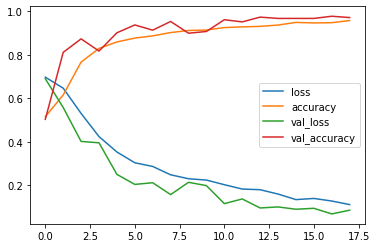

In [22]:
pd.DataFrame(history_2.history).plot()

In [23]:
model_2.evaluate(test_data)

8/8 [==============================] - 3s 361ms/step - loss: 0.0865 - accuracy: 0.9720


[0.08646251261234283, 0.972000002861023]

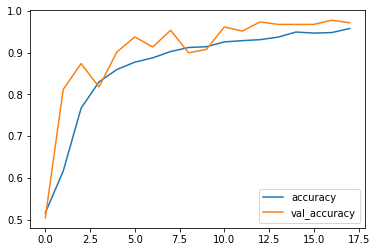

In [24]:
pd.DataFrame({"accuracy":history_2.history["accuracy"],"val_accuracy":history_2.history["val_accuracy"]}).plot()


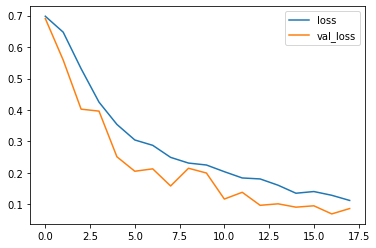

In [25]:
pd.DataFrame({"loss":history_2.history["loss"],"val_loss":history_2.history["val_loss"]}).plot()
